# Activation Functions

### Learning Objectives
- Learn ReLU, Sigmoid, Tanh because IOAI wants you to (more specificially their equations, use cases, and weaknesses)
- Briefly cover Softmax and Leaky ReLU since they are quite useful (we can add more later)

In [1]:
! pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

## The Big Three (Sigmoid, Tanh, ReLU)
These three are the most fundemental activation functions used in AI because they are non-linear yet differentiable. This means that the neural network model non-linear relationships. Below, let's take a look at the three functions, their definitions, and their graphs. We will do a detailed comparison later on.

### Sigmoid and Tanh
These two functions look almost the same, having an S-shape that tapers off towards the ends.  
  
The sigmoid function outputs a value between 0 and 1. Observe that the values near the boundaries of -4 and 4 tend to 0. This means that the gradients near those points are near zero - which is bad for backpropagation and gradient descent!

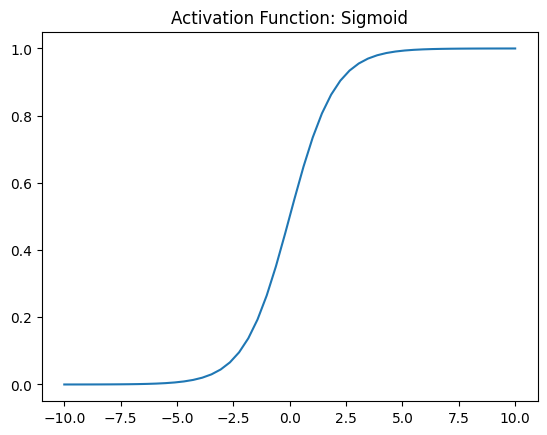

In [2]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function: Sigmoid')
plt.show()

The Tanh function outputs a value between -1 and 1. It has the same issue near the boundaries, but has a sharper gradient in the center.

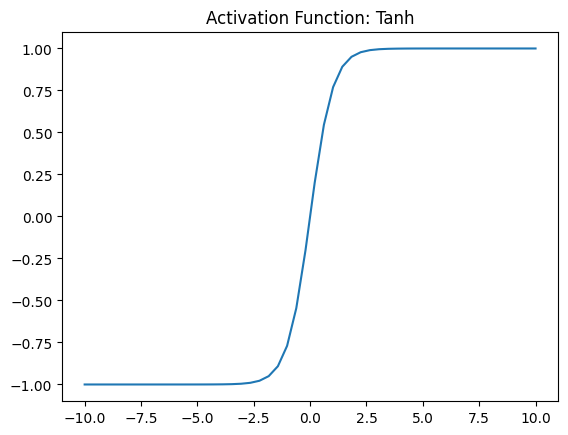

In [3]:
def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1.'''
    return np.tanh(x)

x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Activation Function: Tanh')
plt.show()

### ReLU
ReLU is the most different from the other activation functions. Instead of a S-shaped curve, we have the linear function y=x if x>0, but y=0 if x<0.

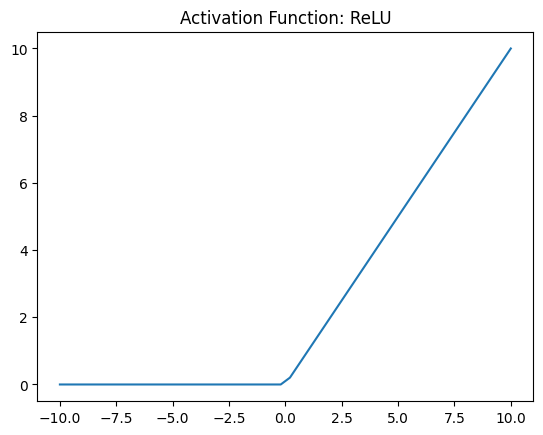

In [4]:
def relu(x):
    ''' Returns 0 if x<0, and x if x>0. '''
    return np.maximum(0, x)

x = np.linspace(-10, 10)
plt.plot(x, relu(x))
plt.axis('tight')
plt.title('Activation Function: ReLU')
plt.show()

## Comparisons
### Sigmoid
**Returns**: A value between 0 and 1.  
**Strengths**: Output layer for binary classification, as it requires a value between 0 and 1.  
**Weaknessess**: 
- Vanishing Gradient near boundaries (-4 and 4)
- Output is not zero centered, which may cause optimization issues leading to slower convergence

### Tanh
**Returns**: A value between -1 and 1.  
**Strengths**: Zero-centered, hence more suitable for use in hidden layers of neural networks.  
**Weaknessess**: Vanishing Gradient near boundaries still exists, as with sigmoid

### ReLU
**Returns**: A value between 0 and infinity.  
**Strengths**: 
- Computationally efficient, compared to other activation functions
- No vanishing gradient as it does not decrease near boundaries
- Hence great for hidden layers in deep neural networks!
  
**Weaknessess**: 
- Exploding gradients since output is unbounded
- 'Dying ReLU' problem where neurons output 0 for all values, due to a large number of inputs all resulting in negative values

## Other Activation Functions
It seems that there is no perfect activation function... and in fact there isn't. However, researchers have come up with new and inventive ways in desperate attempts to improve performance. We will go through just two simple activation functions that will come into use quite often. If you ever feel stuck and want to throw something at your model and pray that it works, try this [list of 15 different activation functions](https://encord.com/blog/activation-functions-neural-networks/).

### Leaky ReLU
The 'leaky' ReLU allows negative values to 'leak' out instead of forcing it to zero. This is done by scaling the output of negative values, often by an adjustable factor. This will reduce the possibility of encountering the 'dying ReLU' problem.

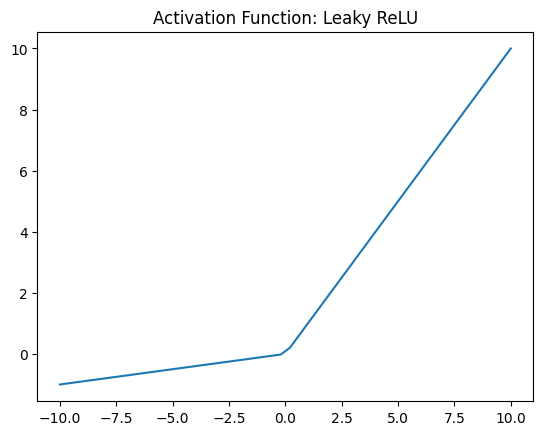

In [5]:
def leaky_relu(x, alpha=0.1):
    ''' Returns 0 if x<0, and x if x>0. '''
    return np.where(x > 0, x, alpha*x)

x = np.linspace(-10, 10)
plt.plot(x, leaky_relu(x))
plt.axis('tight')
plt.title('Activation Function: Leaky ReLU')
plt.show()

### Softmax
This is mostly used in the scenario where you need to output probability, such as in multiclass classification or in the attention mechanism. Observe the equation of softmax, and reason to yourself why the sum of all softmax scores must be equals to one, and convince yourself that this is good because it is a probability distrubution.  
  
The graph may not look very useful. However, it can be interpreted. In the output distribution from -10 to 10, the higher the value, the higher its probability (imagine the input data is a probability score), hence the softmax score increases towards 10, resulting in the shape of the graph you see.

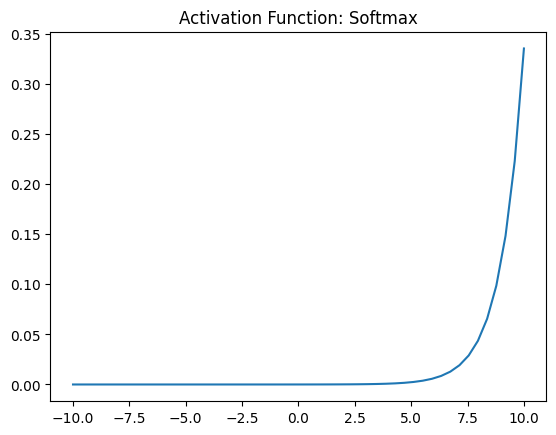

In [6]:
def softmax(x):
    ''' Compute softmax values for each sets of scores in x. '''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.linspace(-10, 10)
plt.plot(x, softmax(x))
plt.axis('tight')
plt.title('Activation Function: Softmax')
plt.show()

### Sources
- https://www.nbshare.io/notebook/751082217/Activation-Functions-In-Python/
- https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/nn_activation_functions.ipynb
- https://www.geeksforgeeks.org/tanh-vs-sigmoid-vs-relu/